


# **Aprendizado de Máquina Supervisionado**

https://www.kaggle.com/competitions/titanic/data

## Setup

In [60]:
import pandas as pd

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
import warnings
warnings.filterwarnings("ignore")

In [119]:
df = pd.read_csv('/content/drive/MyDrive/UP/train.csv',
                    sep=',', encoding='iso-8859-1')

In [121]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Limpeza de dados

In [122]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [123]:
df = df.dropna()

In [124]:
df['Sex'].replace({'female': 0, 'male': 1}, inplace=True)

In [125]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Fare'])

In [126]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
1,1,1,0,38.0,1,0
3,1,1,0,35.0,1,0
6,0,1,1,54.0,0,0
10,1,3,0,4.0,1,1
11,1,1,0,58.0,0,0


In [127]:
df['Age'].unique()

array([38.  , 35.  , 54.  ,  4.  , 58.  , 34.  , 28.  , 19.  , 49.  ,
       65.  , 45.  , 29.  , 25.  , 23.  , 46.  , 71.  , 21.  , 47.  ,
       24.  , 32.5 , 37.  , 36.5 , 22.  , 61.  , 56.  , 50.  ,  1.  ,
        3.  , 44.  ,  2.  , 40.  , 31.  , 32.  , 62.  , 30.  , 52.  ,
       63.  , 36.  ,  0.92, 17.  , 18.  , 16.  , 45.5 , 41.  , 60.  ,
       27.  , 33.  , 14.  , 64.  , 48.  , 55.  , 39.  , 53.  , 42.  ,
       80.  , 15.  , 70.  ,  6.  , 51.  , 57.  , 43.  , 11.  , 26.  ])

In [128]:
df['Age'] = df['Age'].map(str)
df['Age'] = df['Age'].replace({'0.92' : '1.0', '.5' : '', '.0' : ''})
df['Age'] = df['Age'].str[:-2]

In [129]:
df['Age'].unique()

array(['38', '35', '54', '4', '58', '34', '28', '19', '49', '65', '45',
       '29', '25', '23', '46', '71', '21', '47', '24', '32', '37', '36',
       '22', '61', '56', '50', '1', '3', '44', '2', '40', '31', '62',
       '30', '52', '63', '17', '18', '16', '41', '60', '27', '33', '14',
       '64', '48', '55', '39', '53', '42', '80', '15', '70', '6', '51',
       '57', '43', '11', '26'], dtype=object)

In [130]:
df.shape

(183, 6)

In [134]:
previsores = df.iloc[:, 1:5].values

In [135]:
previsores

array([[1, 0, '38', 1],
       [1, 0, '35', 1],
       [1, 1, '54', 0],
       [3, 0, '4', 1],
       [1, 0, '58', 0],
       [2, 1, '34', 0],
       [1, 1, '28', 0],
       [1, 1, '19', 3],
       [1, 0, '49', 1],
       [1, 1, '65', 0],
       [1, 1, '45', 1],
       [2, 0, '29', 0],
       [3, 1, '25', 0],
       [1, 0, '23', 3],
       [1, 1, '46', 1],
       [1, 1, '71', 0],
       [1, 1, '23', 0],
       [1, 1, '21', 0],
       [1, 1, '47', 0],
       [1, 1, '24', 0],
       [2, 0, '32', 0],
       [1, 1, '54', 0],
       [1, 0, '19', 0],
       [1, 1, '37', 1],
       [1, 1, '24', 0],
       [2, 1, '36', 0],
       [1, 0, '22', 1],
       [1, 1, '61', 0],
       [1, 1, '56', 0],
       [1, 0, '50', 0],
       [2, 1, '1', 2],
       [2, 1, '3', 1],
       [1, 0, '44', 0],
       [1, 0, '58', 0],
       [3, 0, '2', 0],
       [1, 1, '40', 0],
       [1, 0, '31', 1],
       [1, 0, '32', 0],
       [1, 1, '38', 1],
       [1, 0, '35', 1],
       [1, 1, '44', 2],
       [1, 1, '37', 

In [136]:
previsores.shape

(183, 4)

In [139]:
alvo = df.iloc[:, 0].values

In [140]:
alvo

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1])

In [142]:
alvo.shape

(183,)

# **ESCALONAMENTO**

In [143]:
from sklearn.preprocessing import StandardScaler

In [144]:
previsores_esc = StandardScaler().fit_transform(previsores)

In [145]:
previsores_esc

array([[-0.37225618, -1.03901177,  0.14958308,  0.83362754],
       [-0.37225618, -1.03901177, -0.04273802,  0.83362754],
       [-0.37225618,  0.96245301,  1.17529566, -0.7230443 ],
       [ 3.52047984, -1.03901177, -2.03005615,  0.83362754],
       [-0.37225618, -1.03901177,  1.43172381, -0.7230443 ],
       [ 1.57411183,  0.96245301, -0.10684506, -0.7230443 ],
       [-0.37225618,  0.96245301, -0.49148728, -0.7230443 ],
       [-0.37225618,  0.96245301, -1.0684506 ,  3.94697121],
       [-0.37225618, -1.03901177,  0.85476048,  0.83362754],
       [-0.37225618,  0.96245301,  1.88047306, -0.7230443 ],
       [-0.37225618,  0.96245301,  0.59833234,  0.83362754],
       [ 1.57411183, -1.03901177, -0.42738024, -0.7230443 ],
       [ 3.52047984,  0.96245301, -0.68380839, -0.7230443 ],
       [-0.37225618, -1.03901177, -0.81202246,  3.94697121],
       [-0.37225618,  0.96245301,  0.66243937,  0.83362754],
       [-0.37225618,  0.96245301,  2.26511528, -0.7230443 ],
       [-0.37225618,  0.

In [146]:
previsoresdf = pd.DataFrame(previsores_esc)
previsoresdf

,0,1,2,3
0,-0.372256,-1.039012,0.149583,0.833628
1,-0.372256,-1.039012,-0.042738,0.833628
2,-0.372256,0.962453,1.175296,-0.723044
3,3.520480,-1.039012,-2.030056,0.833628
4,-0.372256,-1.039012,1.431724,-0.723044
...,...,...,...,...
178,-0.372256,-1.039012,0.726546,0.833628
179,-0.372256,0.962453,-0.170952,-0.723044
180,-0.372256,-1.039012,1.303510,-0.723044
181,-0.372256,-1.039012,-1.068451,-0.723044


# **BASES**

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores_esc, alvo, test_size = 0.3, random_state = 0)

In [149]:
x_treino.shape

(128, 4)

In [153]:
x_teste.shape

(55, 4)

In [154]:
y_treino.shape

(128,)

In [155]:
y_teste.shape

(55,)

# **ÁRVORE DE DECISÃO**

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [156]:
arvore = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)
_arvore = arvore.fit(x_treino, y_treino)

[Text(0.4444444444444444, 0.875, 'X[1] <= -0.038\nentropy = 0.948\nsamples = 128\nvalue = [47, 81]'),
 Text(0.2222222222222222, 0.625, 'X[2] <= -2.094\nentropy = 0.429\nsamples = 57\nvalue = [5, 52]'),
 Text(0.1111111111111111, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3333333333333333, 0.375, 'X[2] <= -0.716\nentropy = 0.305\nsamples = 55\nvalue = [3, 52]'),
 Text(0.2222222222222222, 0.125, 'entropy = 0.0\nsamples = 21\nvalue = [0, 21]'),
 Text(0.4444444444444444, 0.125, 'entropy = 0.431\nsamples = 34\nvalue = [3, 31]'),
 Text(0.6666666666666666, 0.625, 'X[2] <= -1.357\nentropy = 0.976\nsamples = 71\nvalue = [42, 29]'),
 Text(0.5555555555555556, 0.375, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.7777777777777778, 0.375, 'X[2] <= 1.592\nentropy = 0.946\nsamples = 66\nvalue = [42, 24]'),
 Text(0.6666666666666666, 0.125, 'entropy = 0.978\nsamples = 58\nvalue = [34, 24]'),
 Text(0.8888888888888888, 0.125, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]')]

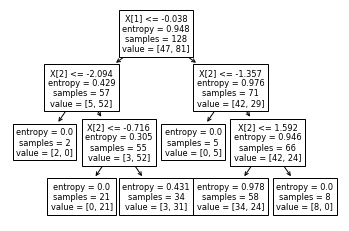

In [157]:
tree.plot_tree(_arvore)

In [158]:
previsoes_arvore = arvore.predict(x_teste)
previsoes_arvore

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1])

In [159]:
y_teste

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0])

In [160]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [161]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_arvore) * 100.0))

Acurácia: 80.00%


In [162]:
confusion_matrix(y_teste, previsoes_arvore)

array([[12,  1],
       [10, 32]])

In [163]:
print(classification_report(y_teste, previsoes_arvore))

              precision    recall  f1-score   support

           0       0.55      0.92      0.69        13
           1       0.97      0.76      0.85        42

    accuracy                           0.80        55
   macro avg       0.76      0.84      0.77        55
weighted avg       0.87      0.80      0.81        55



In [164]:
previsoes_treino = arvore.predict(x_treino)
previsoes_treino

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1])

In [165]:
accuracy_score(y_treino, previsoes_treino)

0.7890625

In [166]:
confusion_matrix(y_treino, previsoes_treino)

array([[44,  3],
       [24, 57]])